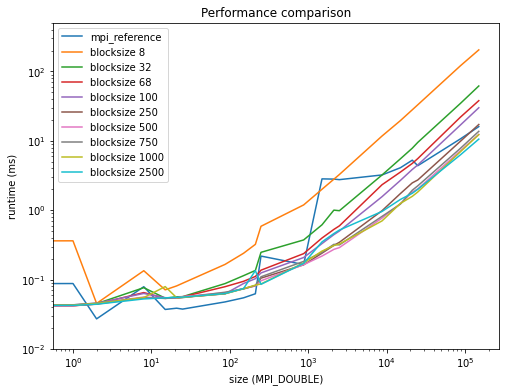

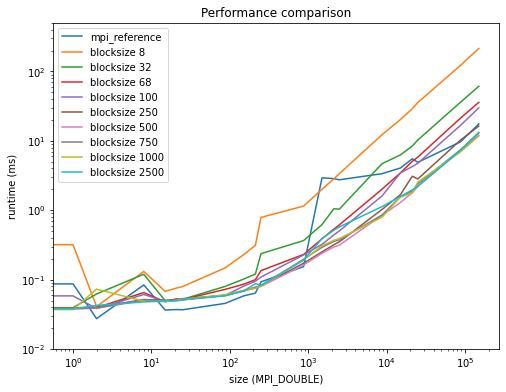

In [37]:
import pandas as pd
from matplotlib import pyplot as plt

args = {
  'xlabel':  'size (MPI_DOUBLE)',
  'ylabel':  'runtime (ms)', 
  'loglog':  True,
  'figsize': (8,6),
  'ylim':    (0.01, 500)
}

def create_plot(log):
  df = pd.read_csv(f"./logs/{log}.log", sep=';')
  per_blocksize = df.groupby(df.blocksize)
  ax = None
  for group in per_blocksize.groups:
    if ax == None:
      ax = per_blocksize.get_group(group).plot(x='size', y='mpi', title=f'blocksize {group}', label='mpi_reference', **args)
    per_blocksize.get_group(group).plot(x='size', y='custom', title=f'Performance comparison', ax=ax, label=f'blocksize {group}', **args)

create_plot('1_20x16')
create_plot('2_20x16')